In [1]:
import os
import alphafold.alphafold_pytorch.utils as utils
import pickle
import matplotlib.pyplot as plt
import numpy as np
import alphafold.compare as compare

In [2]:
import os
os.getcwd()

'/home/franzi/Projects/cradle/alphafold'

In [ ]:
# Load two disogramms to compare
list = os.listdir('distograms')
distance_a = pickle.load(open(f'distograms/distrogram_0.distance', 'rb'))
distance_b = pickle.load(open(f'distograms/torison.distance', 'rb'))

(64, 64, 64)
(88, 88, 64)
(64, 64, 64)
(64, 64, 64)
(64, 64, 64)
(88, 88, 64)
(64, 64, 64)
(64, 64, 64)
(64, 64, 64)
['background_31.distance', 'background_0.distance', 'distrogram_0.distance', 'distogram_1.distance', 'background0_1.distance', 'T1019s2.distance', 'background0_0.distance', 'torison.distance', 'background_30.distance']


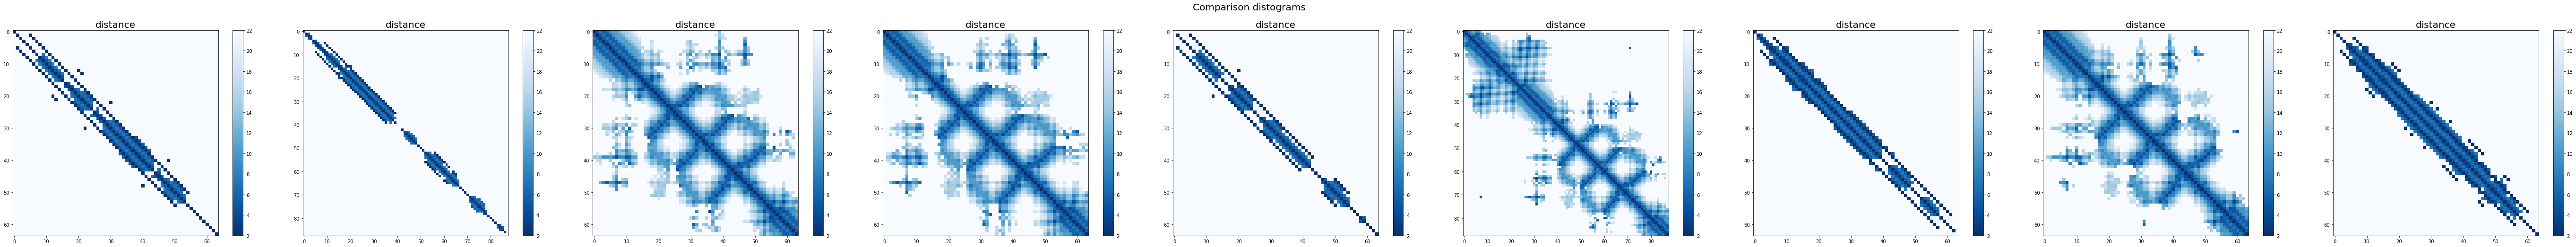

In [25]:
# Explore the available distograms
list = os.listdir('distograms')
distograms = []
for file in list:
    dist = pickle.load(open(f'distograms/{file}', 'rb'))
    print(dist.shape)
    distograms.append(dist)
print(list)
utils.plot_contact_map(f'Comparison distograms', distograms, f'output/a_b.png')

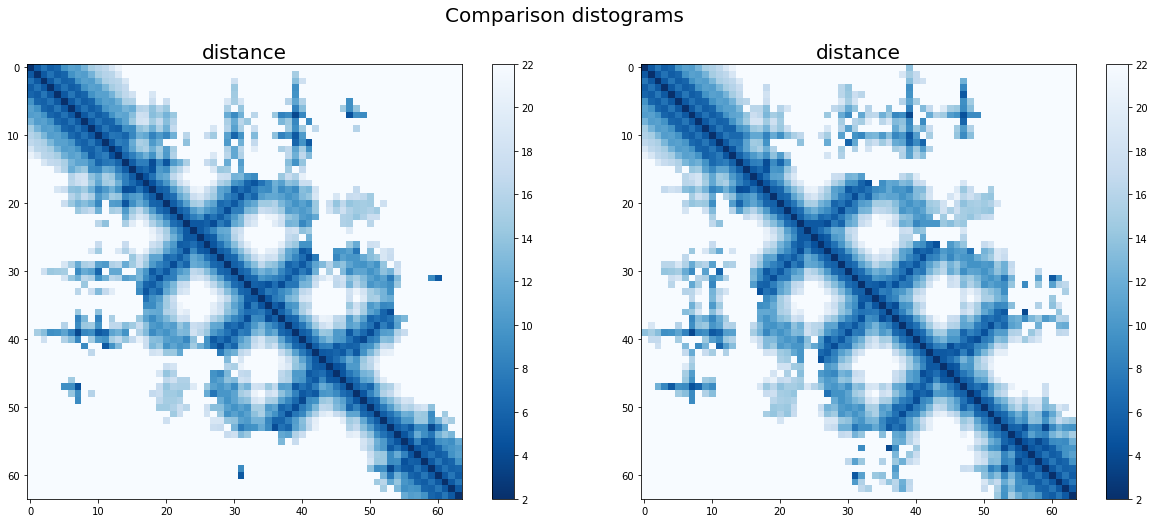

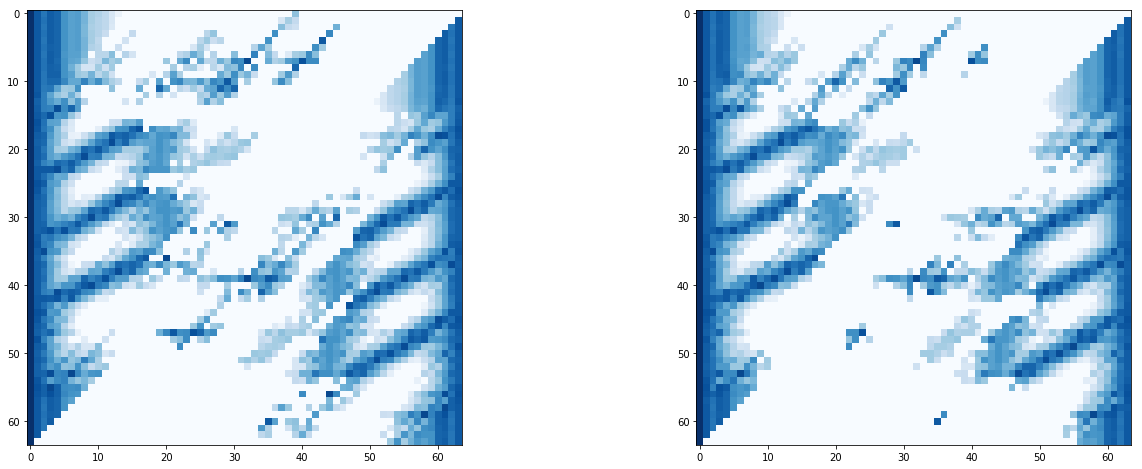

In [27]:
# Restructure distogram
utils.plot_contact_map(f'Comparison distograms', [distance_b, distance_a], f'output/a_b.png')
size = distance_a.shape[0]
correlations = np.zeros([size, size, size])
base_a = compare.restructure(distance_a.argmax(-1))
base_b = compare.restructure(distance_b.argmax(-1))
compare.plot_restructured(base_a, base_b)


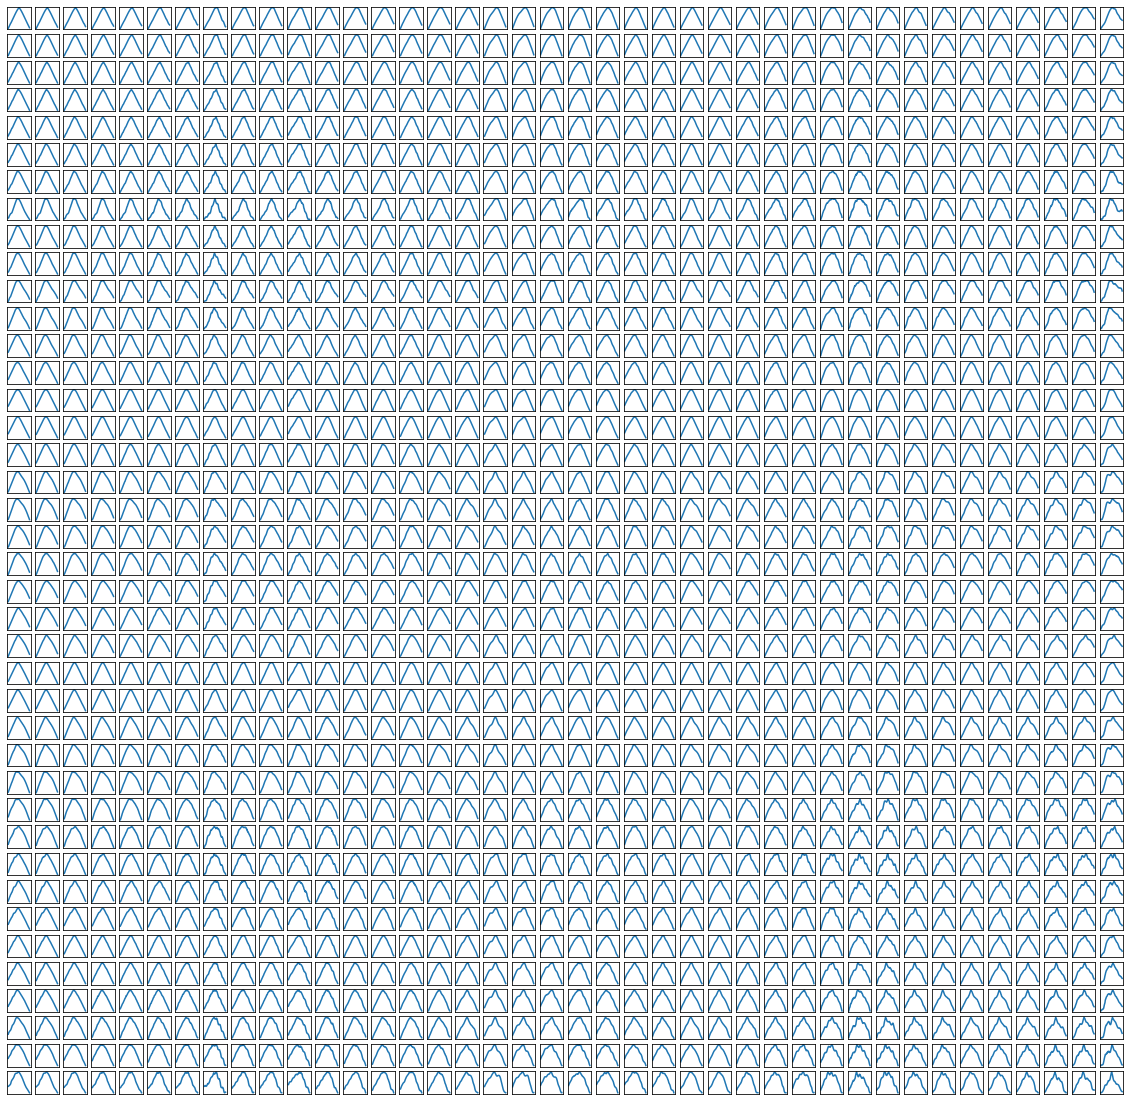

In [31]:
# Correlate rows of distograms with each other
fig, axs = plt.subplots(40, 40, figsize=(20, 20))
for i in range(size):
    for j in range(size):
        correlations[i, j] = np.correlate(base_a[i], base_b[j], "same")
        if j < 40 and i < 40:
            axs[i, j].plot(range(size), correlations[i, j])
            axs[i, j].axes.xaxis.set_visible(False)
            axs[i, j].axes.yaxis.set_visible(False)
plt.show()

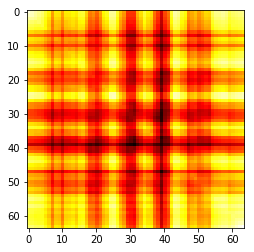

In [32]:
# Correlate rows of distograms with each other
heatmap = np.zeros([size,size])
for i in range(size):
    for j in range(size):
        heatmap[i, j] = np.correlate(base_a[i], base_b[j])
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.show()

In [6]:
print(f'{base_a[0]}, with {base_b[0]} corr {correlations[0,0]}')
print(f'{base_a[25]}, with {base_b[25]} corr {correlations[25,25]}')




[ 0 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63], with [ 0 11 17 27 33 24 27 38 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63] corr [170667. 174636. 178605. 182574. 186543. 190512. 194481. 198450. 202419.
 206388. 210357. 214326. 218295. 222264. 226233. 230202. 234171. 238140.
 242109. 246078. 250047. 254016. 257985. 261954. 265923. 269892. 273861.
 277830. 281799. 285768. 289737. 293706. 297675. 301644. 305613. 309582.
 313551. 317520. 319914. 321615. 323127. 325206. 326907. 327978. 328671.
 324702. 320733. 316764. 312795. 308826. 304857. 300888. 296919. 292950.
 288981. 2850